**Authors**: Carayon Chloé - Taillieu Victor

**Date**: 26/11/2020

---
# LAB1 Machine learning: Linear regression 
---

## Introduction

This first lab aims to let us create our own linear model by implementing gradient descent from scratch.
And then compare our result to a linear model generated by **Scikit Learn** library.



In [1]:
import numpy as np
import pandas as pd
!pip install xlrd
import matplotlib.pyplot as plt
from sklearn import linear_model

You are using pip version 19.0.3, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Let's take a look at our dataframe:

In [2]:
df = pd.read_excel("data/CCPP.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


We have 5 columns with AT, V, AP and RH as our $X$ matrix and PE as our $y$ vector.

## Part 1: Linear Regression from Scratch

Firstly we have to implement the principal functions to build our model.
- normalizeFeatures(params)
- costFunction(params)
- gradientDescent(params)

The parameters we will use are:

- $X$: matrix of observations (m, n + 1)
- $y$: vector of labels (m, 1)
- $w$: vector of weights of the model (n + 1, 1)
- $m$: number of observations
- $n$: number of features

### Normalize Features

Before going through the linear model, we have to normalize all the features.
They have different range and the ones with the heighest values could easily influence the others.
That is why we have to rescale all the variables and make them close to 0. 

In [3]:
# Min-max normalization
def normalizeFeatures(X, n):
    for feat in range(1, n + 1):
        min = np.min(X[:, feat])
        max = np.max(X[:, feat])
        X[:, feat] = (X[:, feat] - min) / (max - min)

In [4]:
def normalizeFeatures(df):
    # min-max normalization
    return (df - df.min()) / (df.max() - df.min())

In [5]:
# Prepare the data
X = normalizeFeatures(df.drop("PE", axis=1))
m, n = X.shape
X.insert(0, "offset", [1 for i in range(m)])
X.describe()

,offset,AT,V,AP,RH
count,9568.0,9568.000000,9568.000000,9568.000000,9568.000000
mean,1.0,0.505417,0.515050,0.504060,0.640067
std,0.0,0.211118,0.226119,0.146963,0.195714
min,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.331445,0.291459,0.401138,0.506267
50%,1.0,0.525071,0.475445,0.496164,0.662399
75%,1.0,0.677337,0.732740,0.603069,0.794504
max,1.0,1.000000,1.000000,1.000000,1.000000


In [6]:
X = np.asmatrix(X)
y = np.asmatrix(df[["PE"]])
w = np.array([[1] for i in range(n + 1)])

### Cost Function

As we know the formula of cost function is :

$ J(w) = \frac{1}{2m} \sum_{i=1}^{m} (h_w(x^{(i)})-y^{(i)})^2$


We use the transpose of the matrix $X^t$ times $X$, it will multiply each element by itself and sum all of them.


In [7]:
def costFunction(X, y, w, m):
    return float(1 / (2 * m) * (X * w - y).T * (X * w - y))

### Gradient descent

We repeat until the convergence the following formula:

$w_k = w_k - \frac{\alpha }{m} \sum_{i=1}^{m} (h_w(x^{(i)})- y^{(i)})x_k^{(i)})$

We use a while loop and stop when the difference between the previous and actual $Cost Function$ is 
less than the threshold value or when the number of iterations is equal to iter.

At each iteration, we update the $Cost Function$, the $gradient$ and $w$. 

When the value of the $Cost Function$ increases, it means that the learning rate is to hight and we have to change it. 
That is why we add the parameter autoAlpha in order to change the value of $\alpha$.

We plot our $CostFunction$ through the iteration to evaluate if the value of $\alpha$ is efficient.

In [8]:
def gradientDescent(X, y, w, m, alpha=0.03, threshold=1e-3, iter=1000, autoAlpha=True):
    i = 0
    J = []

    while True:
        i += 1
        J.append(costFunction(X, y, w, m))

        grad = 1 / m * (X.T * X * w - X.T * y)
        w = w - alpha * grad

        if len(J) > 1:
            if autoAlpha and J[-1] > J[-2]:
                # decrease learning rate if too high
                alpha /= 1.1

            # stop condition
            if abs(J[-1] - J[-2]) < threshold or i == iter:
                break

    # plot cost function
    plt.plot(np.log(J))
    plt.title("Value of the cost function over iterations")
    plt.xlabel("iteration")
    plt.ylabel("log of cost function value")
    plt.show()

    return w

Let's test it with the initial $\alpha$ at 0.03

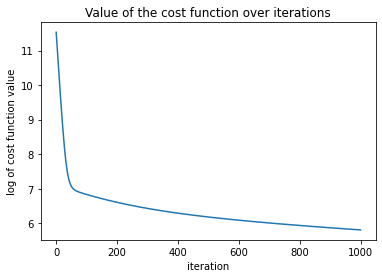

matrix([[279.55302901],
        [ 50.1601198 ],
        [  7.88976754],
        [134.91593391],
        [118.14568576]])

In [9]:
coeffs = gradientDescent(X, y, w, m)
coeffs

We obtain the above plot where the convergence is very low and the log
 of the $CostFunction$ is around 6 which is too much.

 Whereas if we change $\alpha$ and take 0.9. 
 The convergence is better and the log of the $CostFunction$ is less than 3.

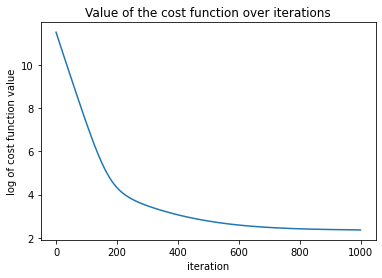

matrix([[497.61122241],
        [-62.80118589],
        [-17.08062738],
        [  5.69077093],
        [ -8.74171866]])

In [10]:
coeffs = gradientDescent(X, y, w, m, alpha=0.9)
coeffs

## Part 2: Compare to Scikit-Learn

We then need to add the following functions to our library:
- meanAbsoluteError

    $ MAE = \frac{\sum_{i=1}^{n} \left \| y_i - x_i \right \|}{n} $ 
   
    
- rootMeanSquaredError

    $ RMSE = \sqrt(\sum_{i=1}^{n} \frac{(\hat{y_i} - y_i)^2}{n})$


- r2

    $ R^2 = \frac{n*\sum_{i=1}^{m} xy - (\sum_{i=1}^{m}x)(\sum_{i=1}^{m}y)}{\sqrt{(n\sum_{i=1}^{m}x^2 - (\sum_{i=1}^{m}x)^2)*(n\sum_{i=1}^{m}y^2 - (\sum_{i=1}^{m}y)^2)} } $




#### Mean Absolute Error 

It will compare the $predicted$ and the $observed$.
Our $predicted$ value was the $y$ matrix whereas the $observed$ was the product of $X$ and $w$.

It gives us the following equation. Knowing that $X$, $w$ and $y$ are matrix.
    
$ MAE = \frac{1}{m} \sum_{i=1}^{m} \left \| X*w  - y \right \| $

In [11]:
def meanAbsoluteError(X, y, w, m):
    return float(1 / m * sum(abs(X * w - y)))

#### rootMeanSquaredError

As we have seen with the $Cost Function$, we can use the transpose of the matrix 
$(observed - predicted)^t$ times $(observed - predicted)$, 
it will multiply each element by itself and sum all of them.

 $\sqrt{\frac{1}{m}*(X*w - y)^{t}*(X*w - y)}$
 

In [12]:
def rootMeanSquaredError(X, y, w, m):
    return float(1 / m * (X * w - y).T * (X * w - y))**(1 / 2)

#### R2


$R^2 =  \frac{(Xw - \bar{y})^t *(Xw - \bar{y})}{(y- \bar{y})^t*(y- \bar{y})} $ 

In [13]:
def r2(X, y, w, m):
    return float(((X * w - np.mean(y)).T * (X * w - np.mean(y))) / ((y - np.mean(y)).T * (y - np.mean(y))))

#### Use LinearRegression from sklearn.linear_model to build a new linear model

Let's build a linear model using the linear regression of the library scikit learn.

We obtain the following result:

In [14]:
model = linear_model.LinearRegression()
model.fit(X, y)
coeffs_sklearn = model.coef_
coeffs_sklearn[0, 0] = model.intercept_
coeffs_sklearn = coeffs_sklearn.T
coeffs_sklearn

array([[502.6995263 ],
       [-69.80621266],
       [-13.14610295],
       [  2.50877176],
       [-11.79083608]])

We have to replace the first value store in coeffs_sklearn by the intercept 
because this first coefficient corresponds to coefficient for the offset column with ones (which is useless). 

#### Compare Linear Models

We can compare our linear model to the Linear Model of Scikit-Learn.

In [15]:
print("Our linear regression model:")
print("MAE:", meanAbsoluteError(X, y, coeffs, m))
print("RMSE:", rootMeanSquaredError(X, y, coeffs, m))
print("R2:", r2(X, y, coeffs, m))

print("\nScikit-learn:")
print("MAE:", meanAbsoluteError(X, y, coeffs_sklearn, m))
print("RMSE:", rootMeanSquaredError(X, y, coeffs_sklearn, m))
print("R2:", r2(X, y, coeffs_sklearn, m))

Our linear regression model:
MAE: 3.670659265506108
RMSE: 4.601240047431185
R2: 0.9121175749993741

Scikit-learn:
MAE: 3.625215807601187
RMSE: 4.557126016749484
R2: 0.9286960898122535


Comparing our scores with the ones of Scikit-learn, we remark that they are very close.  
Our MAE and RMSE are a bit higher and our R2 is a bit smaller than the ones of Scikit-learn.
It is fine because the gradient descent does not give the optimal coefficients. The algorithm would need to iterate infinitely to get them.

## Part 3: Normal Equation

Finally, we write a function to calculate the optimal values for the weights using the normal equation

In [16]:
def normalEquation(X, y):
    return (X.T * X)**-1 * X.T * y

In [17]:
print("Our gradient descent:\n", coeffs)
print("\nScikit-learn:\n", coeffs_sklearn)
print("\nNormal equation:")
normalEquation(X, y)

Our gradient descent:
 [[497.61122241]
 [-62.80118589]
 [-17.08062738]
 [  5.69077093]
 [ -8.74171866]]

Scikit-learn:
 [[502.6995263 ]
 [-69.80621266]
 [-13.14610295]
 [  2.50877176]
 [-11.79083608]]

Normal equation:


matrix([[502.6995263 ],
        [-69.80621266],
        [-13.14610295],
        [  2.50877176],
        [-11.79083608]])

The normal equation gives an approach to the Linear Regression. As we can see the result of our 
gradient descent did not reach the Normal Equation, but we are closed to it.

The result of Scikit-Learn and the Normal Equation is the same so we can suppose that 
Scikit-Learn use the method of the Normal Equation to perform the linear regression. 


## Conclusion

This first lab allows us to familiarize with the implementation of a linear regression model from scratch
and using Scikit-Learn library.
As we will reuse our implementation, we decided to create a class implementing our linear regression model.
